In [3]:
#"Smart Monitoring of Drinking Water Quality Using Machine Learning"
# STEP 1: Install & Import Libraries
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import pandas as pd

df = pd.read_csv("/content/lead_in_drinking_water_sampling_results (1).csv")
print(df.shape)
df.head()


(1458, 11)


,Sample Number,Label D,Sample Date,Received Date,District,School,Sample Point,Result,MCL,Consumption Point,Additional Sampling Completed
0,1527914.0,M1004565,07/26/2021 07:02:00 AM,07/30/2021 03:36:58 PM,Brandywine,BRANDYWINE HIGH SCHOOL,STAFF BATH GYM LOBBY,0.00052,0.015,False,False
1,1527904.0,M1004561,07/26/2021 07:00:00 AM,07/30/2021 03:33:20 PM,Brandywine,BRANDYWINE HIGH SCHOOL,TRAINERS RM GYM SINK,0.03370,0.015,True,False
2,1527907.0,M1004562,07/26/2021 06:52:00 AM,07/30/2021 03:34:46 PM,Brandywine,BRANDYWINE HIGH SCHOOL,BOYS BR BY RM 213 SK,0.02030,0.015,False,False
3,1527921.0,M1004569,07/26/2021 06:50:00 AM,07/30/2021 03:39:20 PM,Brandywine,BRANDYWINE HIGH SCHOOL,GIRLS BR BY RM 213,0.00155,0.015,False,False
4,1527917.0,M1004567,07/26/2021 06:40:00 AM,07/30/2021 03:38:11 PM,Brandywine,BRANDYWINE HIGH SCHOOL,RM 124 FOODS LAB SNK,0.00294,0.015,True,False


In [6]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.head())


(1458, 11)
Index(['Sample Number', 'Label D', 'Sample Date', 'Received Date', 'District',
       'School', 'Sample Point', 'Result', 'MCL', 'Consumption Point',
       'Additional Sampling Completed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample Number                  1412 non-null   float64
 1   Label D                        1458 non-null   object 
 2   Sample Date                    1458 non-null   object 
 3   Received Date                  1458 non-null   object 
 4   District                       1458 non-null   object 
 5   School                         1458 non-null   object 
 6   Sample Point                   1455 non-null   object 
 7   Result                         1458 non-null   float64
 8   MCL                            1458 non-null   float64
 9   Cons

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



In [8]:
print(df.columns.tolist())


['sample_number', 'label_d', 'sample_date', 'received_date', 'district', 'school', 'sample_point', 'result', 'mcl', 'consumption_point', 'additional_sampling_completed']


In [9]:
df = pd.get_dummies(df, columns=['sample_point'], drop_first=True)


In [11]:
df.to_csv('cleaned_lead_dataset.csv', index=False)
print(" Cleaned dataset saved as cleaned_dataset.csv")


 Cleaned dataset saved as cleaned_dataset.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# STEP 4: Define Target (Unsafe if Result >= MCL)
df = df.dropna(subset=["Result", "MCL"])
df["Target"] = (df["Result"] >= df["MCL"]).astype(int)

print("\nClass Distribution:\n", df["Target"].value_counts())


Class Distribution:
 Target
0    1384
1      74
Name: count, dtype: int64


In [26]:
from sklearn.impute import SimpleImputer

# Impute missing values (numeric: median, categorical: most frequent)
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


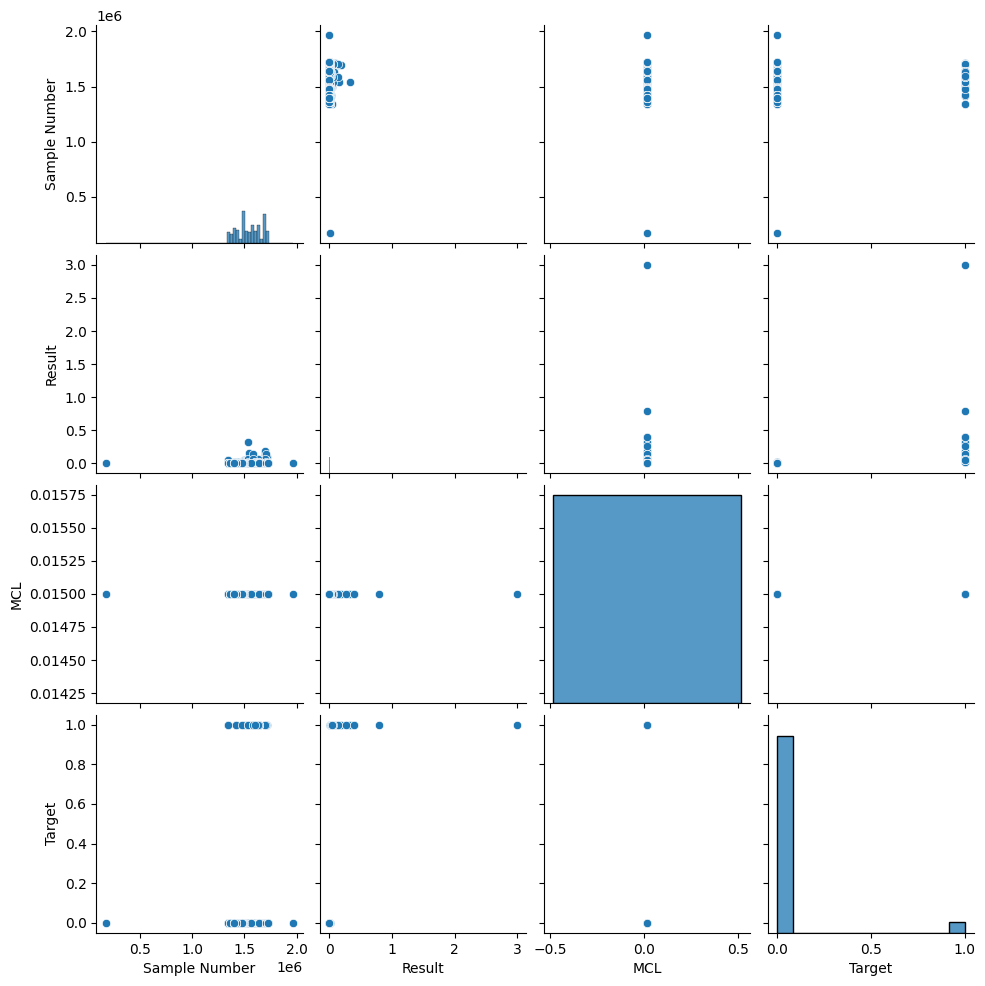

In [27]:
# STEP 5: Pairplot for first few numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    sns.pairplot(df[num_cols[:5]])  # plot first 5 numeric cols to keep it simple
    plt.show()

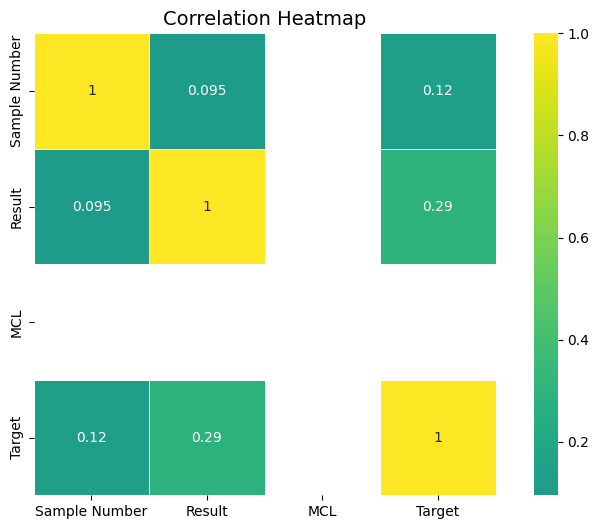

In [37]:
# STEP 6: Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="viridis", center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [17]:
# STEP 7: Prepare Features & Target
X = df.drop(columns=["Result", "Target"])   # drop target + raw result
y = df["Target"]

In [22]:
from sklearn.impute import SimpleImputer
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Impute missing values (numeric: median, categorical: most frequent)
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# STEP 8: Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [24]:
# STEP 9: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9486301369863014

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       277
           1       0.50      0.07      0.12        15

    accuracy                           0.95       292
   macro avg       0.73      0.53      0.55       292
weighted avg       0.93      0.95      0.93       292



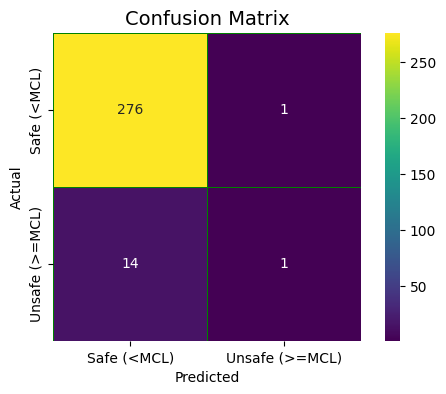

In [40]:
# STEP 10: Confusion Matrix (improved colormap)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
            cbar=True, square=True,
            xticklabels=["Safe (<MCL)", "Unsafe (>=MCL)"],
            yticklabels=["Safe (<MCL)", "Unsafe (>=MCL)"],
            linewidths=0.5, linecolor="green")
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
import joblib
# STEP 11: Save Model + Imputer
joblib.dump(model, "logistic_regression_lead_model.joblib")
joblib.dump(imputer, "imputer_lead_model.joblib")
print("\n✅ Model and imputer saved successfully!")


✅ Model and imputer saved successfully!
